In [1]:
import pandas as pd
import time, datetime, tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle, utils, tools, plots, lmfit
import warnings
warnings.filterwarnings("ignore")

plt.style.use("style.mplstyle")
path_to_save_plots = "/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/active_volume"

In [2]:
tini_october, tend_october = datetime.datetime(2024, 10, 11, 17, 0, 0), datetime.datetime(2024, 12, 3, 11, 40, 0)
data_october, data_err_october = utils.load_data(tini_october, tend_october)

tini_empty, tend_empty = datetime.datetime(2024, 12, 3, 12, 5, 0), datetime.datetime(2024, 12, 5, 12, 0, 0)
data_empty, data_err_empty = utils.load_data(tini_empty, tend_empty)

In [21]:
mapping_october = utils.load_mapping(date=datetime.datetime(2024, 10, 20, 17, 0, 0))
mapping_empty = utils.load_mapping(date=datetime.datetime(2024, 12, 4, 0, 0, 0))

data_october = data_october.loc[(data_october.index<datetime.datetime(2024, 11, 1, 0, 0, 0))|(data_october.index>datetime.datetime(2024, 11, 5, 0, 0, 0))]
data_err_october = data_err_october.loc[(data_err_october.index<datetime.datetime(2024, 11, 1, 0, 0, 0))|(data_err_october.index>datetime.datetime(2024, 11, 5, 0, 0, 0))]
for index, row in mapping_empty.iterrows():
    if row["SYSTEM"]=="APA":
        if row["SC-ID"] in data_empty.columns:
            data_empty = data_empty.loc[(data_empty[row["SC-ID"]]<90)&(data_empty[row["SC-ID"]]>85)]
            data_err_empty = data_err_empty.loc[(data_err_empty[row["SC-ID"]]<90)&(data_err_empty[row["SC-ID"]]>85)]
data_empty = data_empty.loc[(data_empty.index>datetime.datetime(2024, 12, 3, 12, 50, 0))]
data_err_empty = data_err_empty.loc[(data_err_empty.index>datetime.datetime(2024, 12, 3, 12, 50, 0))]

Configuration: october
Configuration: empty


TE0049 TE0073 0
TE0050 TE0074 1
TE0051 TE0075 2
TE0052 TE0076 3
TE0055 TE0079 4
TE0056 TE0080 5
TE0057 TE0081 6
TE0058 TE0082 7
TE0061 TE0085 8
TE0062 TE0086 9
TE0063 TE0087 10
TE0064 TE0088 11
TE0067 TE0091 12
TE0068 TE0092 13
TE0069 TE0093 14
TE0070 TE0094 15


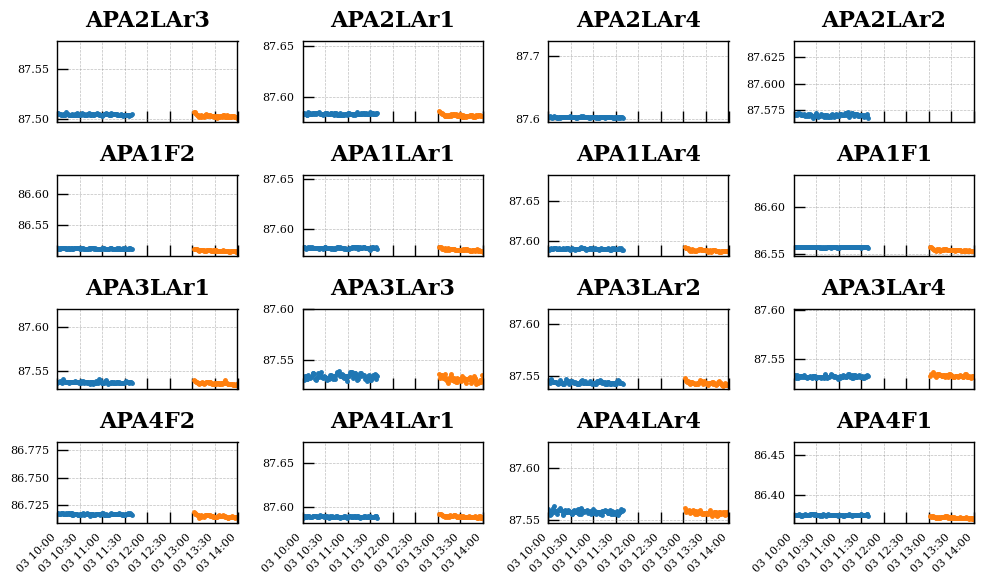

In [5]:
fig, axes = plt.subplots(4, 4, figsize=(10, 6), sharex=True)
axes = axes.flatten()  # Flatten the axes array for easier indexing
cnt = 0
for i, (index, row) in enumerate(mapping_october.iterrows()):
    if row["SYSTEM"]=="APA":
        if row["SC-ID"] in data_october.columns:
            sensor_id = row["CAL-ID"]
            sc_id_empty = mapping_empty[mapping_empty["CAL-ID"]==sensor_id]["SC-ID"].values[0]
            print(row["SC-ID"], sc_id_empty, cnt)
            ax = axes[cnt]
            ax.plot(data_october.index.to_numpy(), (data_october[row["SC-ID"]]/data_october["IE_Card03"]).to_numpy(), "o")
            if sc_id_empty in data_empty.columns:
                ax.plot(data_empty.index.to_numpy(), (0.99775*(data_empty["IE_Card04"].mean()/data_empty["IE_Card03"].mean())*data_empty[sc_id_empty]/data_empty["IE_Card04"]).to_numpy(), "o")
            ax.set_title(row["NAME"])
            ax.set_xlim(datetime.datetime(2024, 12, 3, 10, 0, 0), datetime.datetime(2024, 12, 3, 14, 0, 0))
            ax.grid()
            cnt += 1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
    plt.setp(ax.get_yticklabels(), fontsize=8)
plt.tight_layout()

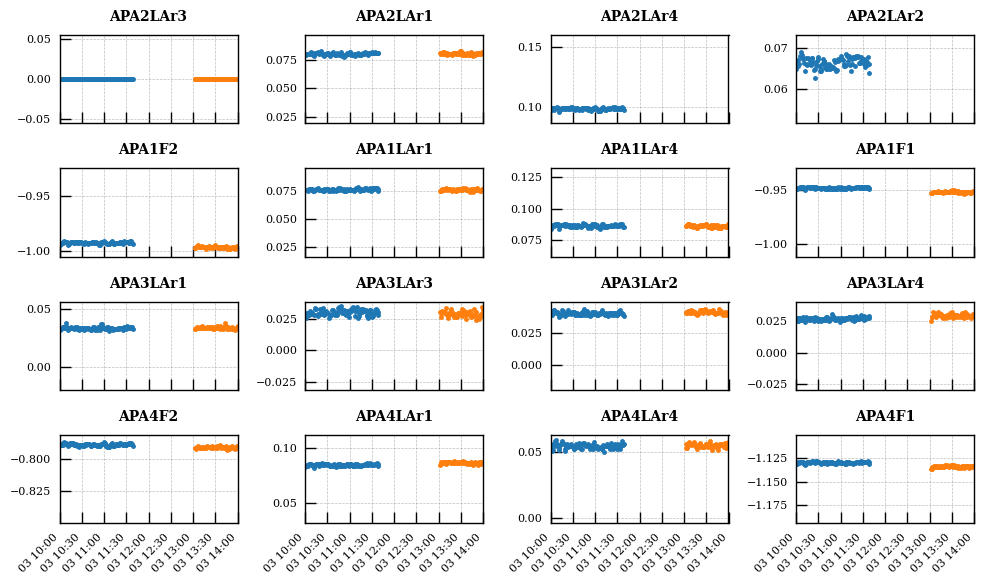

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(10, 6), sharex=True)
axes = axes.flatten()  # Flatten the axes array for easier indexing
cnt = 0
for i, (index, row) in enumerate(mapping_october.iterrows()):
    if row["SYSTEM"]=="APA":
        if row["SC-ID"] in data_october.columns:
            sensor_id = row["CAL-ID"]
            sc_id_empty = mapping_empty[mapping_empty["CAL-ID"]==sensor_id]["SC-ID"].values[0]
            ax = axes[cnt]
            ax.plot(data_october.index.to_numpy(), (data_october[row["SC-ID"]]-data_october["TE0049"]).to_numpy(), "o")
            if sc_id_empty in data_empty.columns:
                ax.plot(data_empty.index.to_numpy(), (data_empty[sc_id_empty]-data_empty["TE0073"]).to_numpy(), "o")
            ax.set_title(row["NAME"], fontsize=10)
            ax.set_xlim(datetime.datetime(2024, 12, 3, 10, 0, 0), datetime.datetime(2024, 12, 3, 14, 0, 0))
            ax.grid()
            cnt += 1

plt.subplots_adjust(hspace=0.5, wspace=0.3)
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
    plt.setp(ax.get_yticklabels(), fontsize=8)
plt.tight_layout()

In [7]:
tools.make_poff(date_end=datetime.datetime(2024, 12, 3, 14, 25, 0), integration_time=60, ref="40525", save_path="/eos/user/j/jcapotor/RTDdata/calib/all", system=None)

Configuration: baseline
Configuration: empty
Configuration: empty


array([-4.65823012e+01, -2.50578299e+01, -3.31484630e+00,  2.41724708e+00,
       -1.85708061e+01, -1.96479404e+01, -4.10648009e+01, -4.66314670e+01,
       -7.24195218e+01, -4.07592061e+01, -2.67001302e+01, -1.49869420e+00,
       -2.66961696e+01, -1.65429372e+01,  0.00000000e+00, -4.29977257e+01,
       -5.74825108e+01, -4.49085308e+01, -3.15667982e+01, -3.57244974e+01,
       -5.19526450e+01, -6.33582801e+01, -4.88006920e+01, -5.09071248e+01,
       -4.92556544e+01,  8.68748909e+00, -3.67289394e+01, -9.10098931e+00,
       -3.50528581e+00, -2.77764284e+01, -4.84216153e+01, -2.60909337e+01,
       -2.12412841e+01,  3.24586159e+00,  2.50834897e+01, -4.43446947e+01,
       -9.56269480e+00, -7.30089009e+00, -2.65614121e+01,  2.10461945e+01,
       -4.11790978e+01, -2.33826001e+01, -1.07133806e+01, -5.98936698e+01,
       -2.80409632e+01, -2.26952151e+01, -3.31468325e+01, -1.51010258e+01,
        5.81579707e+04, -3.34552999e+01, -3.35735185e+01, -3.33670858e+01,
        3.00847792e+00,  

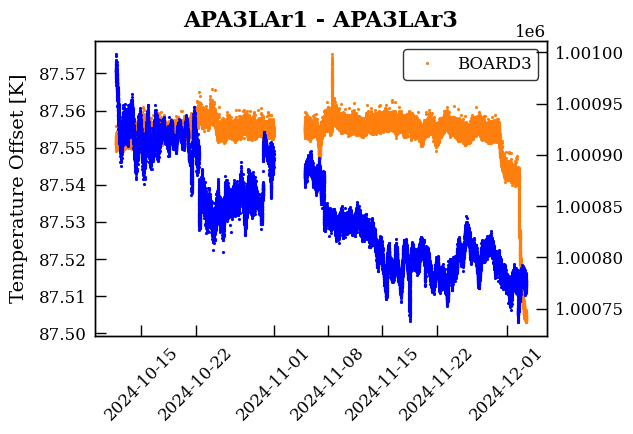

In [31]:
fig, axes = plt.subplots(1, 1)
axes.plot(data_october.index.to_numpy(), (data_october["TE0049"]/data_october["IE_Card03"]).to_numpy(), ".", color="tab:orange", label="BOARD3")
# axes.plot(data_empty.index.to_numpy(), (data_empty["TE0079"]/(data_empty["IE_Card04"]*(data_empty["IE_Card03"][0]/data_empty["IE_Card04"][0]))).to_numpy(),
#           ".", color="tab:orange", label="TE0090")

plt.xticks(rotation=45)
axes2 = axes.twinx()
# axes2.plot(data_october.index.to_numpy(), data_october["TE0048"].to_numpy(), ".", color="tab:blue", label="TE0048")
# axes2.plot(data_empty.index.to_numpy(), (data_empty["TE0048"]).to_numpy(), ".", color="tab:blue", label="TE0048")
axes2.plot(data_october.index.to_numpy(), 1e6*data_october["IE_Card03"].to_numpy(), ".", color="blue", label="IE_Card03")
axes.legend()
# axes2.legend(loc="lower right")
# axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature Offset [K]")
# axes2.set_ylabel("Current [nA]")
axes.set_title("APA3LAr1 - APA3LAr3")
# axes.set_xlim(datetime.datetime(2024, 12, 3, 11, 0, 0), datetime.datetime(2024, 12, 3, 14, 0, 0))
fig.tight_layout()
#fig.savefig(f"{path_to_save_plots}/np04_temp_evolution_TE0048.png", format="png")

In [8]:
profile_pon_ceon = tools.make_tgrad_profile(
    data = data_october, data_err=data_err_october,
    date_ini=datetime.datetime(2024, 11, 29, 17, 10, 0), date_end=datetime.datetime(2024, 11, 29, 18, 10, 0),
    path_to_calib="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 13:25:00_2024-12-03 14:25:00.pkl",
    ref="40525", system=None
)

profile_pon_ceoff = tools.make_tgrad_profile(
    data = data_october, data_err=data_err_october,
    date_ini=datetime.datetime(2024, 12, 2, 10, 10, 0), date_end=datetime.datetime(2024, 12, 2, 11, 10, 0),
    path_to_calib="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 13:25:00_2024-12-03 14:25:00.pkl",
    ref="40525", system=None
)

profile_poff = tools.make_tgrad_profile(
    data = data_october, data_err=data_err_october,
    date_ini=datetime.datetime(2024, 12, 3, 10, 35, 0), date_end=datetime.datetime(2024, 12, 3, 11, 35, 0),
    path_to_calib="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 13:25:00_2024-12-03 14:25:00.pkl",
    ref="40525", system=None
)

Configuration: baseline
Configuration: october
Configuration: october
[39666.0, 39665.0, 39664.0, 39667.0, 39661.0, 39660.0, 39655.0, 39654.0, 39653.0, 39652.0, 99999.0, 39651.0, 39650.0, 40526.0, 40525.0, 40524.0, 39659.0, 39658.0, 39657.0, 39649.0, 39648.0, 39647.0, 39646.0, 39644.0, 39630.0, 39629.0, 39628.0, 39627.0, 39626.0, 39625.0, 39624.0, 39623.0, 39622.0, 39621.0, 39620.0, 39619.0, 40533.0, 40530.0, 40531.0, 40529.0, 39614.0, 39613.0, 39612.0, 39611.0, 39610.0, 39609.0, 39608.0, 39607.0, 44127.0, 44125.0, 44128.0, 44126.0, 40198.0, 40199.0, 40200.0, 40201.0, 44110.0, 44112.0, 44111.0, 44113.0, 49991.0, 44115.0, 44114.0, 49992.0, 37127.0, 37142.0, 48836.0, 48841.0, 48754.0, 49324.0, 49323.0, 48733.0, 49319.0, 39671.0, 39631.0, 49320.0, 37131.0, 39670.0, 49321.0, 37136.0, 37130.0, 49322.0, 39669.0, 37133.0, 40054.0, 40055.0, 40056.0, 40057.0, 40058.0, 40059.0, 40060.0, 40061.0, 40062.0, 40063.0, 40064.0, 40065.0, 40066.0, 40067.0, 40068.0, 40069.0, 40070.0, 38999.0, 38996.0, 38

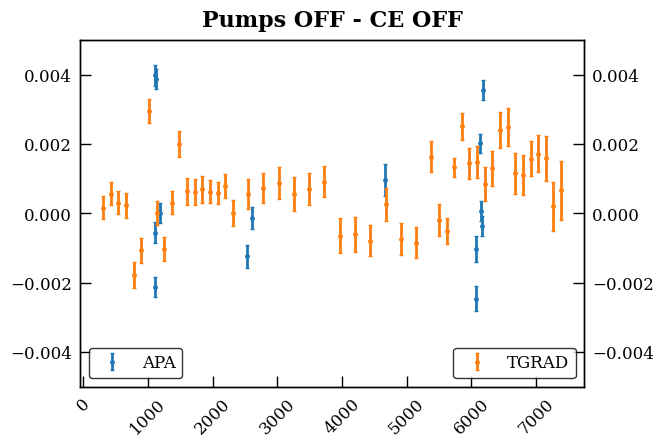

In [9]:
fig, axes = plt.subplots(1, 1)

axes.errorbar(profile_poff.loc[(profile_poff["SYSTEM"]=="APA")]["Y"].to_numpy(),
              (profile_poff.loc[(profile_poff["SYSTEM"]=="APA")]["temp"] - profile_poff.loc[(profile_poff.index == "40200")]["temp"].values[0]).to_numpy(),
             yerr=profile_poff.loc[(profile_poff["SYSTEM"]=="APA")]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA")
# plt.errorbar(profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["Y"].to_numpy(), (profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["temp"]).to_numpy(),
#              yerr=profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="POFF_CEOFF")
plt.xticks(rotation=45)
axes2 = axes.twinx()
axes2.errorbar(profile_poff.loc[(profile_poff["SYSTEM"]=="TGRAD")]["Y"].to_numpy(),
               (profile_poff.loc[(profile_poff["SYSTEM"]=="TGRAD")]["temp"] - profile_poff.loc[(profile_poff.index == "39614")]["temp"].values[0]).to_numpy(),
             yerr=profile_poff.loc[(profile_poff["SYSTEM"]=="TGRAD")]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="TGRAD", color="tab:orange")
axes.set_ylim(-0.005, 0.005)
axes2.set_ylim(-0.005, 0.005)
axes.legend(loc="lower left")
axes.set_title("Pumps OFF - CE OFF")
axes2.legend(loc="lower right")

No handles with labels found to put in legend.


            temp          DCS-ID   SC-ID  BOARD  SLOT SYSTEM      NAME  \
44125  87.488461  47891083165978  TE0050    3.0   1.0    APA  APA2LAr1   
44126        NaN  47891116720410  TE0052    3.0   1.0    APA  APA2LAr2   
44127  87.486899  47891066388762  TE0049    3.0   1.0    APA  APA2LAr3   
44128        NaN  47891099943194  TE0051    3.0   1.0    APA  APA2LAr4   

           W-CABLE FLANGE  CHAN      X       Y       Z COMMENT COMMENT2  \
44125  T_APA/USRAS    NaN   NaN  325.0  6156.0  3307.0     NaN      NaN   
44126  T_APA/USRAS    NaN   NaN  326.0  4500.0  2919.0     NaN      NaN   
44127  T_APA/USRAS    NaN   NaN  326.0  2601.0  3310.0     NaN      NaN   
44128  T_APA/USRAS    NaN   NaN  326.0  1189.0  2917.0     NaN      NaN   

       temp_err  
44125  0.000330  
44126       NaN  
44127  0.000328  
44128       NaN  


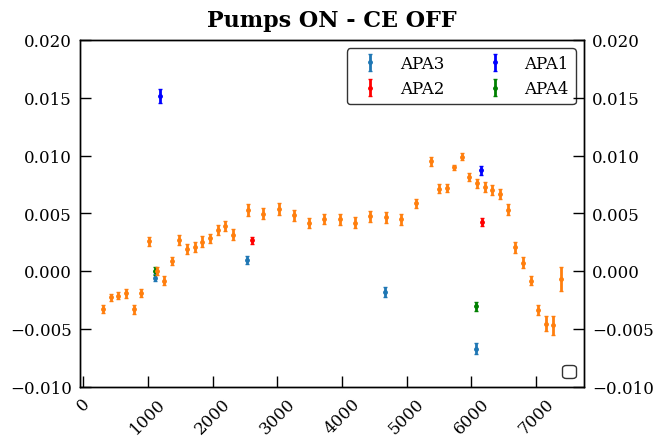

In [53]:
fig, axes = plt.subplots(1, 1)

# print(profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")])
print(profile_pon_ceoff.loc[profile_pon_ceoff["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False)])
axes.errorbar(profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff.index == "44115")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA3")
axes.errorbar(profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff.index == "44115")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA2", color="red")
axes.errorbar(profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))&(profile_pon_ceoff["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))&(profile_pon_ceoff["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff.index == "44115")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))&(profile_pon_ceoff["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA1", color="blue")
axes.errorbar(profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))&(profile_pon_ceoff["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))&(profile_pon_ceoff["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff.index == "44115")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))&(profile_pon_ceoff["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA4", color="green")
# plt.errorbar(profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["Y"].to_numpy(), (profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["temp"]).to_numpy(),
#              yerr=profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="POFF_CEOFF")
plt.xticks(rotation=45)
axes2 = axes.twinx()
axes2.errorbar(profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="TGRAD")]["Y"].to_numpy(),
               (profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="TGRAD")]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff.index == "39614")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="TGRAD")]["temp_err"].to_numpy(), fmt="o", capsize=1.5, color="tab:orange")
axes.set_ylim(-0.01, 0.02)
axes2.set_ylim(-0.01, 0.02)
axes.legend(loc="best", ncol=2)
axes.set_title("Pumps ON - CE OFF")
axes2.legend(loc="lower right")

No handles with labels found to put in legend.


            temp          DCS-ID   SC-ID  BOARD  SLOT SYSTEM      NAME  \
44125  87.502545  47891083165978  TE0050    3.0   1.0    APA  APA2LAr1   
44126        NaN  47891116720410  TE0052    3.0   1.0    APA  APA2LAr2   
44127  87.501311  47891066388762  TE0049    3.0   1.0    APA  APA2LAr3   
44128        NaN  47891099943194  TE0051    3.0   1.0    APA  APA2LAr4   

           W-CABLE FLANGE  CHAN      X       Y       Z COMMENT COMMENT2  \
44125  T_APA/USRAS    NaN   NaN  325.0  6156.0  3307.0     NaN      NaN   
44126  T_APA/USRAS    NaN   NaN  326.0  4500.0  2919.0     NaN      NaN   
44127  T_APA/USRAS    NaN   NaN  326.0  2601.0  3310.0     NaN      NaN   
44128  T_APA/USRAS    NaN   NaN  326.0  1189.0  2917.0     NaN      NaN   

       temp_err  
44125  0.000295  
44126       NaN  
44127  0.000323  
44128       NaN  


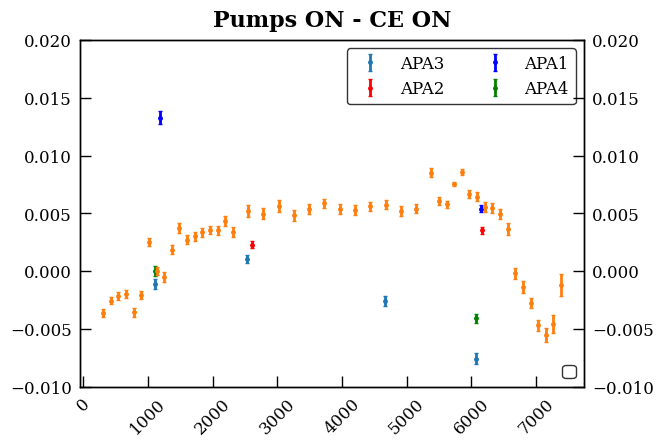

In [55]:
fig, axes = plt.subplots(1, 1)

# print(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")])
print(profile_pon_ceon.loc[profile_pon_ceon["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False)])
axes.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceon.loc[(profile_pon_ceon.index == "44115")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA3")
axes.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceon.loc[(profile_pon_ceon.index == "44115")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA2", color="red")
axes.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))&(profile_pon_ceon["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))&(profile_pon_ceon["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceon.loc[(profile_pon_ceon.index == "44115")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))&(profile_pon_ceon["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA1", color="blue")
axes.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))&(profile_pon_ceon["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))&(profile_pon_ceon["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceon.loc[(profile_pon_ceon.index == "44115")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))&(profile_pon_ceon["NAME"].apply(lambda x: "F" not in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA4", color="green")
# plt.errorbar(profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["Y"].to_numpy(), (profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["temp"]).to_numpy(),
#              yerr=profile_poff.loc[(profile_poff["SYSTEM"]=="HAWAI")]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="POFF_CEOFF")
plt.xticks(rotation=45)
axes2 = axes.twinx()
axes2.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="TGRAD")]["Y"].to_numpy(),
               (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="TGRAD")]["temp"] - profile_pon_ceon.loc[(profile_pon_ceon.index == "39614")]["temp"].values[0]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="TGRAD")]["temp_err"].to_numpy(), fmt="o", capsize=1.5, color="tab:orange")
axes.set_ylim(-0.01, 0.02)
axes2.set_ylim(-0.01, 0.02)
axes.legend(loc="best", ncol=2)
axes.set_title("Pumps ON - CE ON")
axes2.legend(loc="lower right")

<ErrorbarContainer object of 3 artists>

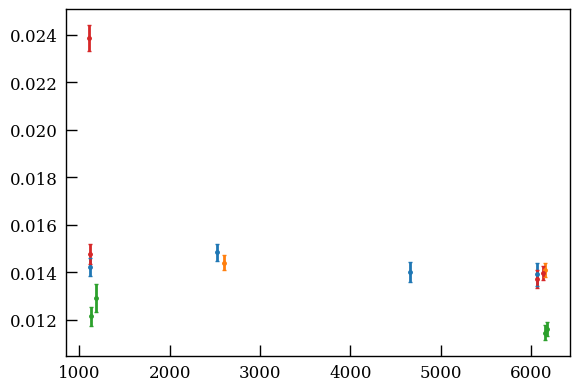

In [59]:
fig, axes = plt.subplots(1,1)
axes.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["temp"]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA3" in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA3")

axes.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["temp"]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA2" in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA2")
axes.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))]["temp"]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA1" in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA1")
axes.errorbar(profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))]["Y"].to_numpy(),
              (profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))]["temp"] - profile_pon_ceoff.loc[(profile_pon_ceoff["SYSTEM"]=="APA")&(profile_pon_ceoff["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))]["temp"]).to_numpy(),
             yerr=profile_pon_ceon.loc[(profile_pon_ceon["SYSTEM"]=="APA")&(profile_pon_ceon["NAME"].apply(lambda x: "APA4" in x if pd.notnull(x) else False))]["temp_err"].to_numpy(), fmt="o", capsize=1.5, label="APA4")